In [5]:
from config import *
from map_wrapper import *

In [6]:
print(f'{year}年{month}月')

2020年5月


In [7]:
import pandas as pd
import sys
sys.path.append('../../py')
import db
import weighted
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import scipy.stats as stats
import numpy as np
import math
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [12]:
conn=db.get_conn()
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<80000", con=conn)

data=data_original[~data_original.job_id.isin(error_job_ids)]

del data['publish_date']
del data['published_on_weekend']
del data['title']
#del data['company_title']
#del data['company_description']
del data['job_description']
del data['job_id']




In [13]:

join_counts=[conn.execute(f"select COUNT(1) from _{year}{month:02}").fetchall()[0][0]]
percents=[]
for i in range(1,month-6+1):
    sql=f"select COUNT(1) from _{year}{month:02} a join _{year}{month-i:02} b on a.job_id = b.job_id"
    #print(sql)
    count=conn.execute(sql).fetchall()[0][0]

    join_counts.append(count)
    subtract = join_counts[i-1]-join_counts[i]
    percents.append(subtract*1.0/join_counts[i])

percents.append(join_counts[-1]/join_counts[0])

In [14]:
join_counts

[109155]

In [15]:
percents

[1.0]

In [16]:
#plt.pie(percents, labels=['1','2','3','4','5','6','7','7+'])
#plt.show()

In [17]:
data.shape[0]

103220

In [18]:
conn.close()

In [19]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_median']=salary_median
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)

    return sub_data

data_format={"percentage":"{:.2%}","salary_mean":"{:.0f}","salary_median":"{:.0f}","salary_95_min":"{:.0f}","salary_95_max":"{:.0f}"}



In [20]:
data_career=get_sub_stats_by_col(data,'career')
data_career.style.format(data_format)

,career,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
47,CTO,35936,15969,35833,65448,39,0.01%
50,反作弊算法工程师,35062,13000,37857,40000,8,0.00%
36,推荐算法工程师,34551,14750,32500,61917,174,0.06%
55,敏捷教练,28344,17500,30000,45000,32,0.01%
53,数据科学家,27761,9219,26429,60000,175,0.06%
11,架构师,26184,9000,25000,52528,6738,2.15%
18,芯片,26067,9669,22500,62500,194,0.06%
27,编译器开发工程师,24537,11500,26429,41167,72,0.02%
9,系统架构设计师,24335,5250,20833,45456,1366,0.44%
37,自然语言处理（NLP）,24142,9808,22500,45000,437,0.14%


# 程序员工资

In [21]:
data_city=get_sub_stats_by_col(data,'province')
#data_city.city=data_city.city.map(translate_dict)
data_city.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,19273,7000,17500,45000,24478,7.83%
上海,17477,7000,15500,40000,51403,16.44%
广东,15416,5833,14000,35000,88275,28.22%
浙江,15032,5750,12500,35000,22131,7.08%
四川,12898,5250,12000,30000,15423,4.93%
江苏,12831,5250,12500,27500,33436,10.69%
陕西,12585,5250,12000,27500,9727,3.11%
湖北,12132,5250,11500,26000,14740,4.71%
湖南,11929,5250,11500,25000,7073,2.26%
福建,11356,5000,10500,22500,5748,1.84%


In [22]:
describe(data_city,'程序员')

2020年5月北京招收程序员24478人。2019年5月北京程序员平均工资19273元，工资中位数17500元，其中95%的人的工资介于7000元到45000元。

2020年5月上海招收程序员51403人。2019年5月上海程序员平均工资17477元，工资中位数15500元，其中95%的人的工资介于7000元到40000元。

2020年5月广东招收程序员88275人。2019年5月广东程序员平均工资15416元，工资中位数14000元，其中95%的人的工资介于5833元到35000元。

2020年5月浙江招收程序员22131人。2019年5月浙江程序员平均工资15032元，工资中位数12500元，其中95%的人的工资介于5750元到35000元。

2020年5月四川招收程序员15423人。2019年5月四川程序员平均工资12898元，工资中位数12000元，其中95%的人的工资介于5250元到30000元。

2020年5月江苏招收程序员33436人。2019年5月江苏程序员平均工资12831元，工资中位数12500元，其中95%的人的工资介于5250元到27500元。

2020年5月陕西招收程序员9727人。2019年5月陕西程序员平均工资12585元，工资中位数12000元，其中95%的人的工资介于5250元到27500元。

2020年5月湖北招收程序员14740人。2019年5月湖北程序员平均工资12132元，工资中位数11500元，其中95%的人的工资介于5250元到26000元。

2020年5月湖南招收程序员7073人。2019年5月湖南程序员平均工资11929元，工资中位数11500元，其中95%的人的工资介于5250元到25000元。

2020年5月福建招收程序员5748人。2019年5月福建程序员平均工资11356元，工资中位数10500元，其中95%的人的工资介于5000元到22500元。

2020年5月辽宁招收程序员10009人。2019年5月辽宁程序员平均工资11343元，工资中位数9000元，其中95%的人的工资介于4000元到32155元。

2020年5月天津招收程序员1974人。2019年5月天津程序员平均工资11227元，工资中位数10000元，其中95%的人的工资介于5000元到22500元。

2020年5月重庆

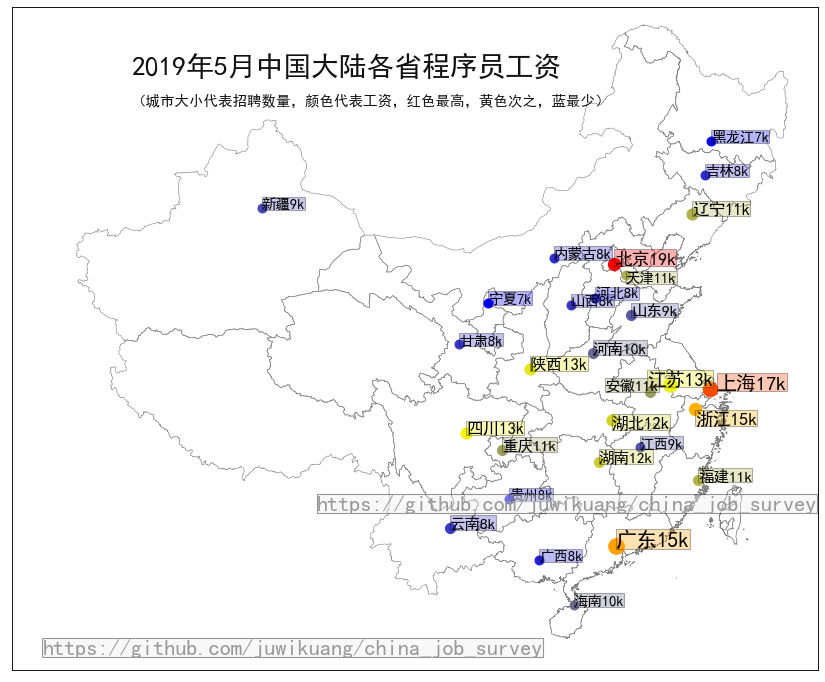

In [23]:
draw_province_map(data_city,2000,'2019年5月中国大陆各省程序员工资')